# Linear Regression

In [1]:
# Importing the NumPy library, commonly used for numerical operations on arrays
import numpy as np

# Importing the train_test_split function from scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing the datasets module from scikit-learn, which contains various example datasets
from sklearn import datasets

# Importing the Matplotlib library's pyplot module, commonly used for plotting and visualizing data
import matplotlib.pyplot as plt

In [2]:
# Generating a synthetic regression dataset with 100 samples and 1 feature using make_regression from scikit-learn
# - n_samples=100: Specifies the number of samples
# - n_features=1: Specifies the number of features (independent variables)
# - noise=20: Adds Gaussian noise to the output to simulate real-world data
# - random_state=4: Sets a seed for reproducibility of the dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Printing the shape of the feature matrix X and the target vector y
# X.shape should output (100, 1) indicating 100 samples with 1 feature
# y.shape should output (100,) indicating 100 target values
print(X.shape, y.shape)

(100, 1) (100,)


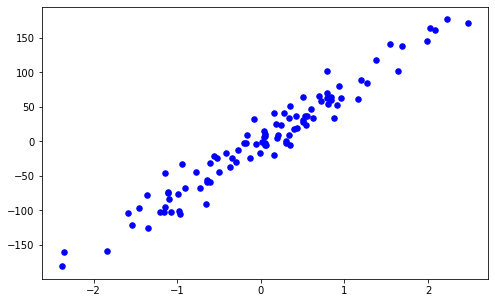

In [3]:
# Creating a new figure for plotting with a specified size of 8x5 inches
fig = plt.figure(figsize=(8, 5))

# Plotting a scatter plot using Matplotlib
# - X[:,0]: Selects the first (and only) feature from the dataset X for the x-axis
# - y: The target values on the y-axis
# - color='b': Sets the color of the scatter plot points to blue
# - marker='o': Uses a circle ('o') marker for each point
# - s=30: Sets the size of the markers to 30
plt.scatter(X[:,0], y, color='b', marker='o', s=30)

## Model Using Sklearn Library

### Hypothesis: $h(x) = wx + b$ 
Our target is to minimize the error between the predicted value $h(x)$ and the actual value $y$. <br> 
### $\binom{minimize}{w, b} = (h(x) - y))^2$ <br>

This formula is valid for a single feature (input variable), so we have one weight $w$ and one bias $b$. However, in the case of multiple features, $w$ becomes a vector of weights, each corresponding to a different feature.
### The cost function $J(w,b) = \frac{1}{2n}\sum_{i=1}^{n}(h(x_i)-y_i)^{2}$
where:
- $n$ is the number of training examples.
- $h(x_i)$ is the predicted value for the $i$-th training example.
- $y_i$ is the actual value for the $i$-th training example.


### Gradient discent
![](gradient-descent.png)
Gradient discent to minimize the cost function $J(w, b)$. To do that, we are going to repeateadly update the $w$ and $b$ until convergence using the following formula:
### $dw = \frac{1}{n}\sum_{i=1}^{n} (h(x_i) - y_i)\cdot x_i$
### $db = \frac{1}{n}\sum_{i=1}^{n} (h(x_i) - y_i)$
### Update rule
The weights $w$ and bias $b$ are updated using the following rules:
### $w = w - \alpha * dw$
### $b = b - \alpha * db$

## Model From Scratch

In [4]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        # Initialize the learning rate and the number of iterations
        self.lr = lr
        self.n_iters = n_iters
        
        # Initialize weights and bias as None; they will be set in the fit method
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # Get the number of samples and features from the input data
        n_samples, n_features = X.shape
        
        # Initialize weights as a zero array with the same length as the number of features
        # Initialize bias as 0
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Perform gradient descent for the specified number of iterations
        for _ in range(self.n_iters):
            # Calculate the linear hypothesis (predictions): hx = X * weights + bias
            hx = np.dot(X, self.weights) + self.bias
            
            # Compute the gradients for weights and bias
            dw = (1/n_samples) * np.dot(X.T, (hx - y))
            db = (1/n_samples) * np.sum(hx - y)
            
            # Update weights and bias using gradient descent
            # temp1 = self.weights - self.lr * dw
            # temp2 = self.bias - self.lr * db
            # self.weights = temp1
            # self.bias = temp2
            
            # Alternatively, the weights and bias can be updated directly as follows:
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        # Make predictions using the learned weights and bias
        hx = np.dot(X, self.weights) + self.bias
        return hx            

## Model Training

In [5]:
# Split the dataset into training and testing sets
# X_train and y_train are the features and target variable for the training set
# X_test and y_test are the features and target variable for the testing set
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training
# random_state=1234 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

# Create an instance of the LinearRegression class with a learning rate of 0.01
regressor = LinearRegression(lr=0.01)

# Train the linear regression model using the training data (X_train, y_train)
regressor.fit(X_train, y_train)

### $\text{mse} = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$

In [6]:
def mse(y_true, y_predicted):
    # Calculate the Mean Squared Error (MSE)
    # The difference between the true values (y_true) and the predicted values (y_predicted) is squared
    # The mean of these squared differences is then returned as the MSE
    return np.mean((y_true - y_predicted)**2)

In [7]:
# Use the trained linear regression model to make predictions on the test data
# The predict method applies the learned weights and bias to the features in X_test
predicted = regressor.predict(X_test)

In [8]:
# Calculate the Mean Squared Error (MSE) between the actual values (y_test) and the predicted values (predicted)
mse_value = mse(y_test, predicted)

# Print the calculated MSE value
print(mse_value)

305.7719958301902


## Plot The Decision Line

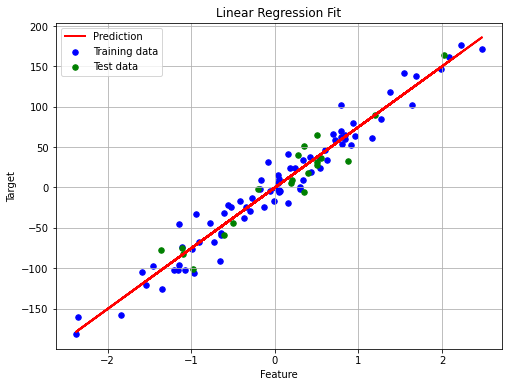

In [9]:
# Create a new figure for plotting with a specified size (width=8, height=6)
fig = plt.figure(figsize=(8,6))

# Use the trained model to make predictions for the entire dataset X
# This is used to plot the regression line
y_pred_line = regressor.predict(X)

# Plot the training data points
# Scatter plot for training data (X_train, y_train) with blue color and marker size 30
plt.scatter(X_train, y_train, color='blue', s=30, label='Training data')

# Plot the testing data points
# Scatter plot for testing data (X_test, y_test) with green color and marker size 30
plt.scatter(X_test, y_test, color='green', s=30, label='Test data')

# Plot the regression line
# Line plot using the entire dataset X and predictions y_pred_line with red color, linewidth 2
plt.plot(X, y_pred_line, color='red', linewidth=2, label='Prediction')


# Add labels, title, and legend for clarity
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()